# Used Car Auction Prices


# Data Science Methodology

    1. Business Understanding
    2. Data Preparation
    3. Exploratory Data Analysis (EDA)
    4. Data Modelling

# Business Understanding
**Business Problem**

Perusahaan lelang mobil bekas kurang mendapatkan profit yang optimal. Mobil lelang bekas memiliki selisih dengan harga pasar sebesar $69.242.617. Perusahaan memiliki data *history* dari penjualan sebelumnya. Perusahaan lelang mobil ingin memprediksi harga mobil yang memiliki profit yang optimal. 

**Business Metrics**

Meningkatkan profit perusahaan lelang mobil

**Solusi**

Membuat prediksi harga mobil dengan profit yang optimal



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('C:/Users/Muhammad Hanif/Desktop/Data Science/Latihan Portofolio/Car Auc Price/car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
df.head(3)

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields,

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [3]:
# Understand the variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Number of Duplicated'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum().sum(),df.duplicated(keep=False).sum().sum()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

             Number of unique values Number of Null Number of Duplicated
Variable                                                                
year                              34              0                    0
make                              96          10301                    0
model                            973          10399                    0
trim                            1975          10651                    0
body                              86          13195                    0
transmission                       2          65353                    0
vin                           550296              0                    0
state                             38              0                    0
condition                         41          11794                    0
odometer                      172277             94                    0
color                             20            749                    0
interior                          17            749

Pengertian masing-masing feature :

    1. vin: Vehicle identification number. Nomor unik masing-masing 
    kendaraan yang dapat mewakilkan jenis kendaraan, jenis mesin dan asal
    negara produsen
    2. mmr: Manheim Market Report. harga pasaran suatu mobil
    3. odometer : jarak yang ditempuh oleh kendaraan

In [4]:
df_clean = df.dropna()
print('Banyaknya data yang hilang',(1-df_clean.shape[0]/df.shape[0])*100,'%')
df_clean

Banyaknya data yang hilang 15.474820645978692 %


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [5]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Number of Duplicated'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df_clean[var].nunique(),df_clean[var].isnull().sum().sum(),df_clean[var].unique()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

             Number of unique values Number of Null  \
Variable                                              
year                              26              0   
make                              53              0   
model                            768              0   
trim                            1507              0   
body                              85              0   
transmission                       2              0   
vin                           465779              0   
state                             34              0   
condition                         41              0   
odometer                      160427              0   
color                             20              0   
interior                          17              0   
seller                         11927              0   
mmr                             1099              0   
sellingprice                    1806              0   
saledate                        3609              0   

         

## Exploratory Data Analysis(EDA)

Mengetahui informasi persebaran dan korelasi data dari dataset yang ada

In [6]:
#Variabel
categorical =['make','model','trim','body','vin','state','color','interior','seller']
binary = ['transmission']
numeric= ['condition','odometer','mmr','year','sellingprice','sm']
date = ['salesdate']
target = ['sellingprice']

### Persebaran Data Numerik

In [7]:
df_clean['sellingprice'].sum() - df_clean['mmr'].sum()

-69242617

**Business Insight** : harga penjualan mobil lelang masih memiliki profit yang kurang optimal karena memiliki harga penjualan yang lebih rendah $69.242.617 dari harga pasaran

In [8]:
df_clean['sm'] = df_clean['sellingprice']/df['mmr']

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9956/1264004255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sm'] = df_clean['sellingprice']/df['mmr']


In [9]:
df_clean[df_clean['sm']>=1].count()/df_clean.count()

year            0.491199
make            0.491199
model           0.491199
trim            0.491199
body            0.491199
transmission    0.491199
vin             0.491199
state           0.491199
condition       0.491199
odometer        0.491199
color           0.491199
interior        0.491199
seller          0.491199
mmr             0.491199
sellingprice    0.491199
saledate        0.491199
sm              0.491199
dtype: float64

In [10]:
df_clean = df_clean[df_clean['sm']>=1]

In [11]:
df_clean.describe()

,year,condition,odometer,mmr,sellingprice,sm
count,232011.000000,232011.000000,232011.000000,232011.000000,232011.000000,232011.000000
mean,2010.295128,3.723606,64691.392068,13879.072867,14827.088138,1.120748
std,3.731996,0.822257,51504.042158,9314.209818,9599.477349,0.436905
min,1990.000000,1.000000,1.000000,25.000000,100.000000,1.000000
25%,2008.000000,3.200000,27810.500000,7775.000000,8700.000000,1.023166
50%,2012.000000,3.900000,48873.000000,12400.000000,13200.000000,1.057018
75%,2013.000000,4.300000,91092.000000,18200.000000,19200.000000,1.125000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000,81.333333


condition          AxesSubplot(0.125,0.536818;0.227941x0.343182)
odometer        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
mmr             AxesSubplot(0.672059,0.536818;0.227941x0.343182)
year                  AxesSubplot(0.125,0.125;0.227941x0.343182)
sellingprice       AxesSubplot(0.398529,0.125;0.227941x0.343182)
sm                 AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

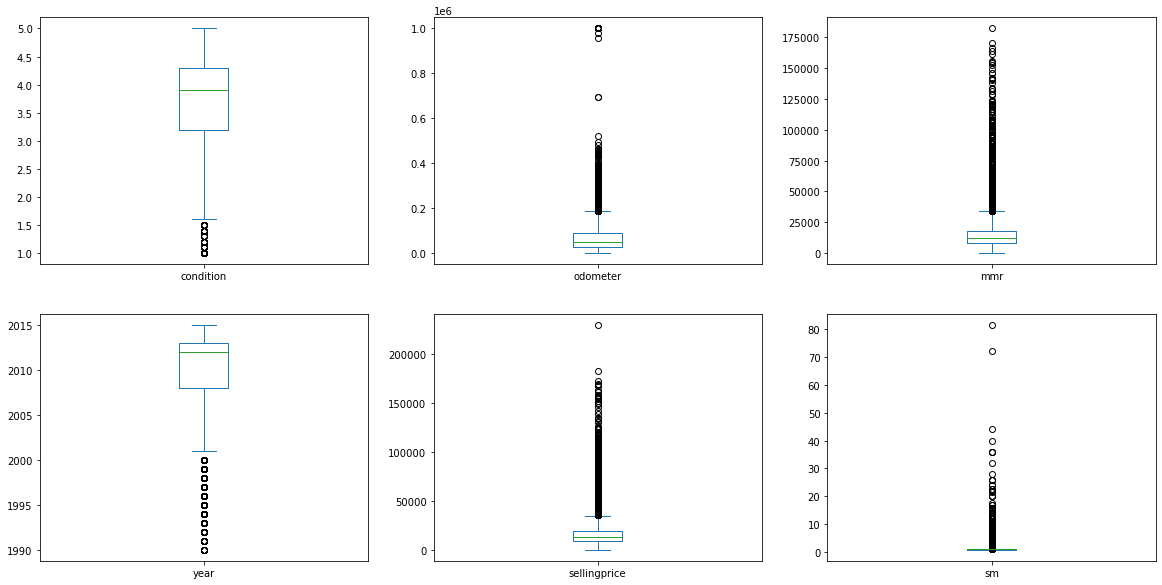

In [12]:
df_clean[numeric].plot(kind = 'box',subplots = True,layout = (2,3),figsize=(20,10))

**Data Insight** : odometer, mmr, sellingprice dan year memiliki banyak outlier

### Removing Outlier

digunakan jika ada nilai yang kurang dari 25% dan lebih dari 75% maka nilai tersebut akan didrop

In [13]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [14]:
df_clean[numeric] = remove_outlier_IQR(df_clean[numeric])
df_clean.describe()

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,year,condition,odometer,mmr,sellingprice,sm
count,227738.000000,231452.000000,225070.000000,224634.000000,224113.000000,211121.000000
mean,2010.518886,3.730096,59692.809855,12899.860551,13765.821407,1.068893
std,3.376849,0.812543,42172.774197,7346.765068,7484.044720,0.062987
min,2001.000000,1.600000,1.000000,25.000000,100.000000,1.000000
25%,2008.000000,3.200000,27199.250000,7550.000000,8500.000000,1.020619
50%,2012.000000,3.900000,47040.000000,12150.000000,12900.000000,1.049774
75%,2013.000000,4.300000,86400.500000,17450.000000,18400.000000,1.099150
max,2015.000000,5.000000,186007.000000,33800.000000,34900.000000,1.277612


condition          AxesSubplot(0.125,0.536818;0.227941x0.343182)
odometer        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
mmr             AxesSubplot(0.672059,0.536818;0.227941x0.343182)
year                  AxesSubplot(0.125,0.125;0.227941x0.343182)
sellingprice       AxesSubplot(0.398529,0.125;0.227941x0.343182)
sm                 AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

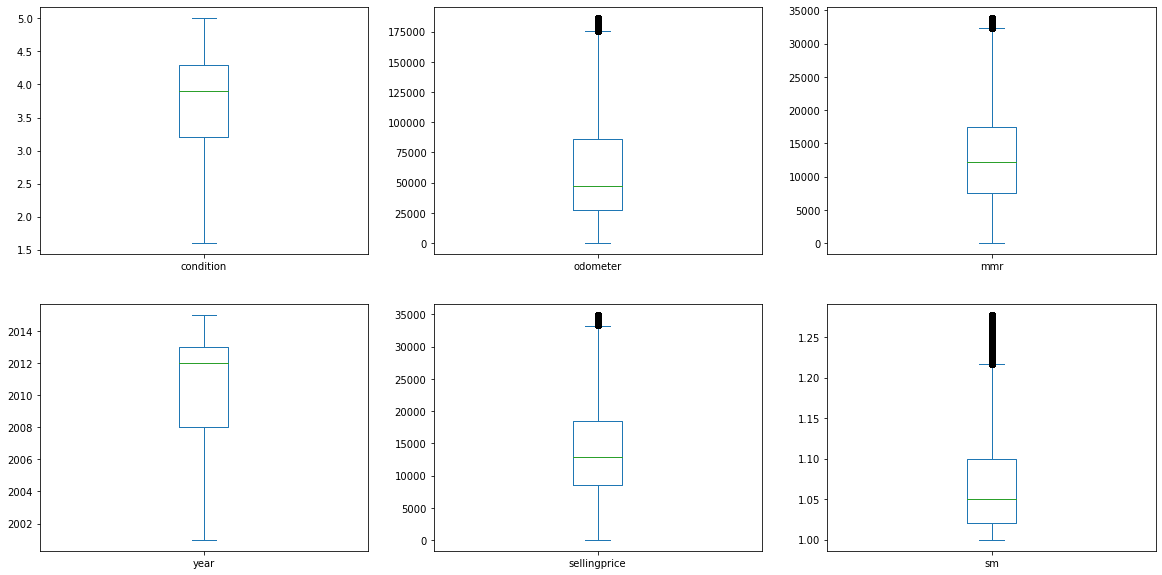

In [15]:
df_clean[numeric].plot(kind = 'box',subplots = True,layout = (2,3),figsize=(20,10))

data numerik sudah tidak ada outlier

In [16]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Number of Duplicated'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df_clean[var].nunique(),df_clean[var].isnull().sum().sum(),df_clean[var].unique()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

             Number of unique values Number of Null  \
Variable                                              
year                              15           4273   
make                              52              0   
model                            740              0   
trim                            1409              0   
body                              84              0   
transmission                       2              0   
vin                           230420              0   
state                             34              0   
condition                         35            559   
odometer                      110877           6941   
color                             20              0   
interior                          17              0   
seller                          8392              0   
mmr                              738           7377   
sellingprice                     893           7898   
saledate                        2773              0   

         

timbul nilai null pada df maka dapat dihilangkan

In [17]:
df_clean = df_clean.dropna()

In [18]:
print('Banyaknya data yang hilang',(1-df_clean.shape[0]/df.shape[0])*100,'%')

Banyaknya data yang hilang 64.50517258965911 %


condition          AxesSubplot(0.125,0.536818;0.227941x0.343182)
odometer        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
mmr             AxesSubplot(0.672059,0.536818;0.227941x0.343182)
year                  AxesSubplot(0.125,0.125;0.227941x0.343182)
sellingprice       AxesSubplot(0.398529,0.125;0.227941x0.343182)
sm                 AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

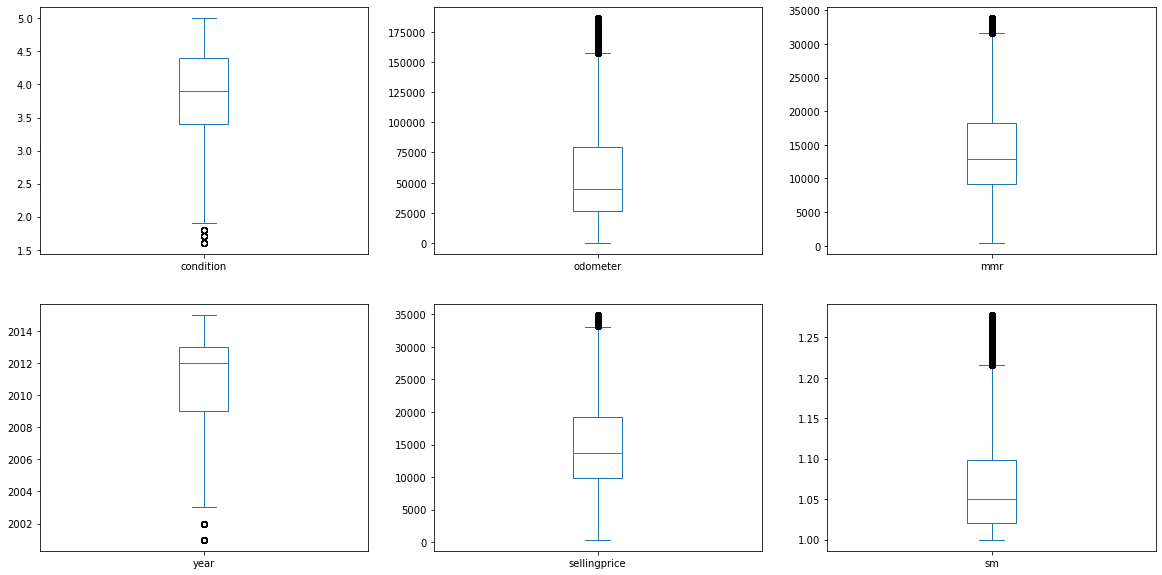

In [19]:
df_clean[numeric].plot(kind = 'box',subplots = True,layout = (2,3),figsize=(20,10))

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


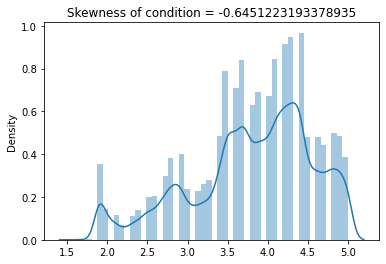

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


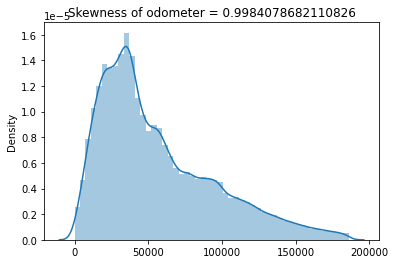

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


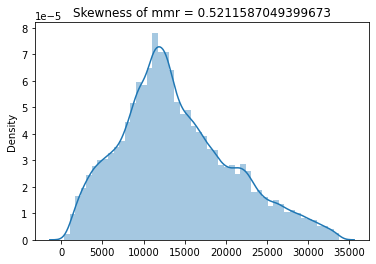

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


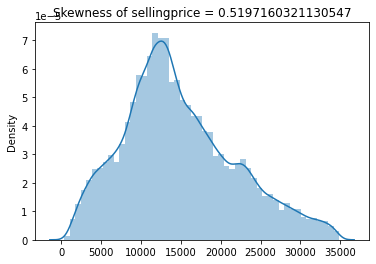

In [20]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
skewness = str(skew(df_clean['condition']))
sns.distplot(x=df_clean['condition'])
plt.title("Skewness of condition"+" = "+skewness)
plt.show()
skewness = str(skew(df_clean['odometer']))
sns.distplot(x=df_clean['odometer'])
plt.title("Skewness of odometer"+" = "+skewness)
plt.show()
skewness = str(skew(df_clean['mmr']))
sns.distplot(x=df_clean['mmr'])
plt.title("Skewness of mmr"+" = "+skewness)
plt.show()
skewness = str(skew(df_clean['sellingprice']))
sns.distplot(x=df_clean['sellingprice'])
plt.title("Skewness of sellingprice"+" = "+skewness)
plt.show()

**Data Insight** : condition memiliki distribusi multimodal, odometer memiliki distribusi unimodal, mmr dan sellingprice memiliki distribusi bimodal

### Hubungan antara Data Kategorikal dengan Sellingprice

<AxesSubplot:xlabel='make'>

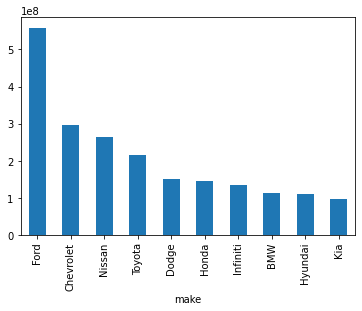

In [21]:
categorical =['make','model','trim','body','vin','state','color','interior','seller']
(df_clean.groupby('make')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

**Business Insight** : mobil ford merupakan mobil yang paling banyak menghasilkan penjualan yang kurang optimum 

<AxesSubplot:xlabel='model'>

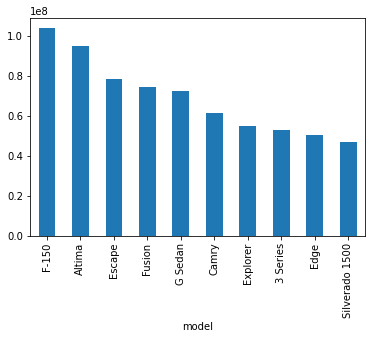

In [22]:
(df_clean.groupby('model')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

<AxesSubplot:xlabel='trim'>

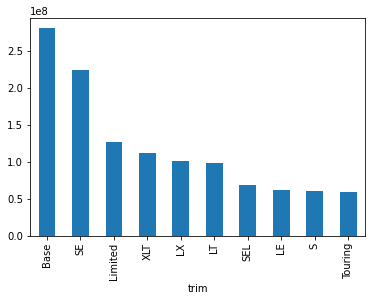

In [23]:
(df_clean.groupby('trim')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

<AxesSubplot:xlabel='state'>

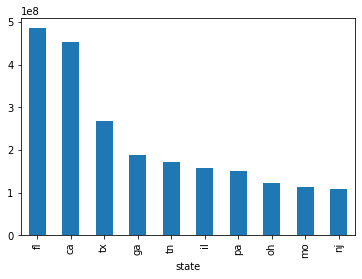

In [24]:
(df_clean.groupby('state')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

**Business Insight** : florida dan california merupakan state yang menghasilkan penjualan yang paling besar

<AxesSubplot:xlabel='color'>

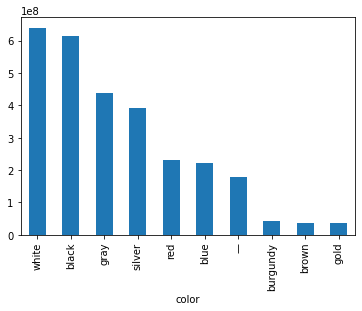

In [25]:
(df_clean.groupby('color')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

<AxesSubplot:xlabel='transmission'>

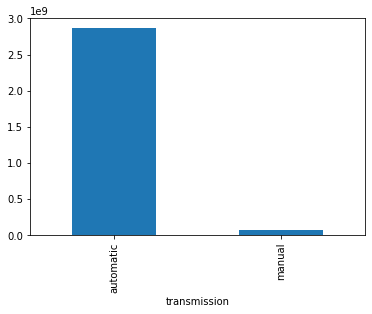

In [26]:
(df_clean.groupby('transmission')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

**Business Insight** : mobil dengan transmissi automatic merupakan jenis transmisi yang menghasilkan penjualan terbesar

<AxesSubplot:xlabel='seller'>

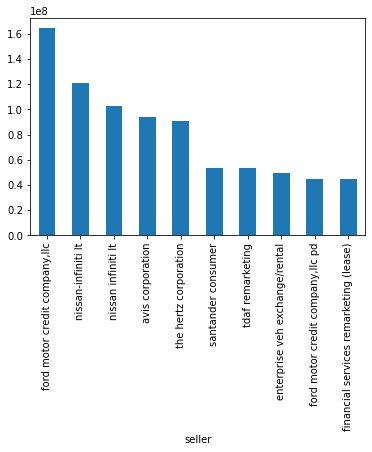

In [27]:
(df_clean.groupby('seller')['sellingprice'].sum().sort_values(ascending=False)[:10].plot(kind='bar'))

### Hubungan antara Data Numerik dengan Sellingprice

In [28]:
numeric= ['condition','odometer','mmr','sellingprice','year']

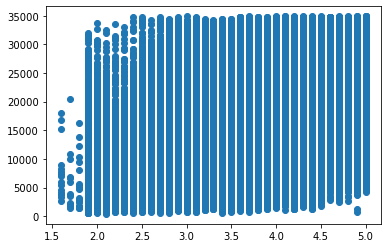

In [29]:
plt.scatter(x = df_clean['condition'],y= df_clean['sellingprice'])
plt.show()

**Business Insight** : Semakin tinggi kondisi mobil dapat meningkatkan penjualan mobil

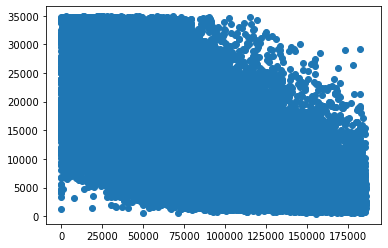

In [30]:
plt.scatter(x = df_clean['odometer'],y= df_clean['sellingprice'])
plt.show()

**Business Insight** : Semakin kecil odometer semakin besar penjualan mobil

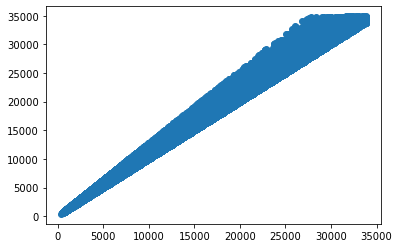

In [31]:
plt.scatter(x = df_clean['mmr'],y= df_clean['sellingprice'])
plt.show()

**Business Insight** : Masih banyak harga mobil yang dibawah dari harga mmr

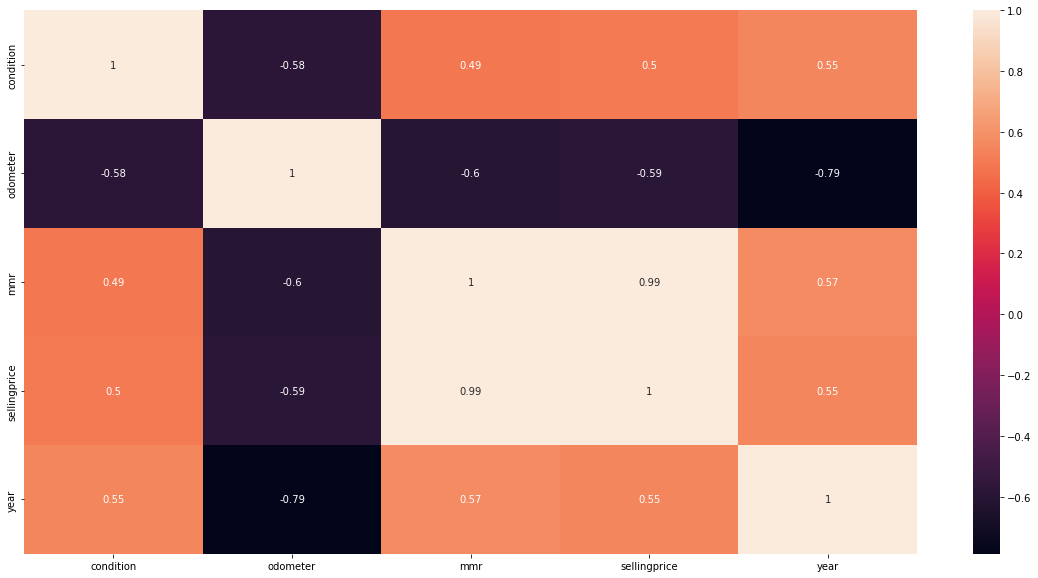

In [32]:
df_convert_new = df_clean[numeric].copy()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_convert_new.corr(), annot=True)
plt.show()

nilai mmr dan selling price sangat berkorelasi antara satu sama lain
nilai odometer dengan year berkorelasi negatif

### Hubungan Tanggal dengan Penjualan

In [33]:
df_clean['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
8         Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
11        Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
                           ...                   
558787    Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)
558791    Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558805    Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
Name: saledate, Length: 198349, dtype: object

In [34]:
df_clean['saledate'] = pd.to_datetime(df_clean['saledate'],utc=True)
df_clean['saledate']

0        2014-12-16 04:30:00+00:00
1        2014-12-16 04:30:00+00:00
3        2015-01-28 20:30:00+00:00
8        2014-12-18 04:00:00+00:00
11       2014-12-16 04:00:00+00:00
                    ...           
558787   2015-07-08 02:45:00+00:00
558791   2015-07-08 00:30:00+00:00
558805   2015-07-06 23:15:00+00:00
558807   2015-07-08 02:30:00+00:00
558808   2015-07-08 02:30:00+00:00
Name: saledate, Length: 198349, dtype: datetime64[ns, UTC]

In [35]:
df_clean['year'] = df_clean['saledate'].dt.strftime('%Y')
df_clean['month'] = df_clean['saledate'].dt.strftime('%B')
df_clean['day'] = df_clean['saledate'].dt.strftime('%A')
df_clean['hour'] = df_clean['saledate'].dt.strftime('%H:00')

In [36]:
print(df_clean['year'])
print(df_clean['month'])
print(df_clean['day'])
print(df_clean['hour'])

0         2014
1         2014
3         2015
8         2014
11        2014
          ... 
558787    2015
558791    2015
558805    2015
558807    2015
558808    2015
Name: year, Length: 198349, dtype: object
0         December
1         December
3          January
8         December
11        December
            ...   
558787        July
558791        July
558805        July
558807        July
558808        July
Name: month, Length: 198349, dtype: object
0           Tuesday
1           Tuesday
3         Wednesday
8          Thursday
11          Tuesday
            ...    
558787    Wednesday
558791    Wednesday
558805       Monday
558807    Wednesday
558808    Wednesday
Name: day, Length: 198349, dtype: object
0         04:00
1         04:00
3         20:00
8         04:00
11        04:00
          ...  
558787    02:00
558791    00:00
558805    23:00
558807    02:00
558808    02:00
Name: hour, Length: 198349, dtype: object


<AxesSubplot:xlabel='year'>

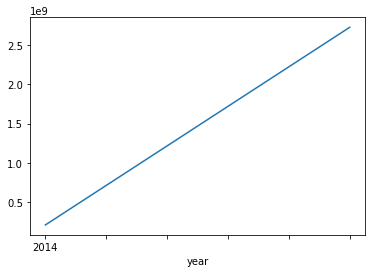

In [37]:
df_clean.groupby('year')['sellingprice'].sum().plot(kind='line')

**business insight** : penjualan dari 2014 ke 2015 meningkat

<AxesSubplot:xlabel='month'>

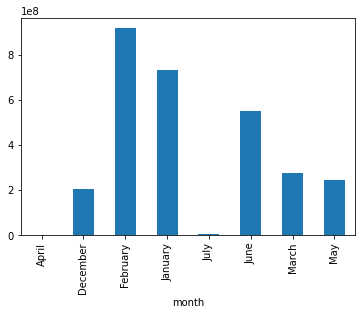

In [38]:
df_clean.groupby('month')['sellingprice'].sum().plot(kind='bar')

**business insight** : penjualan tertinggi ada pada bulan februari dan terendah ada pada bulan july. Trend penjualan dari februari ke bulan mei cenderung menurun. 

<AxesSubplot:xlabel='day'>

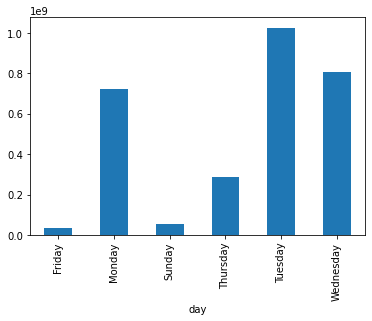

In [39]:
df_clean.groupby('day')['sellingprice'].sum().plot(kind='bar')

**business insight** : penjualan tertinggi ada pada hari selasa dan terendah ada pada hari jumat

<AxesSubplot:xlabel='hour'>

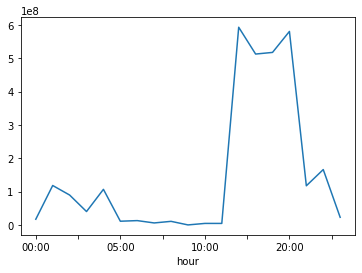

In [40]:
df_clean.groupby('hour')['sellingprice'].sum().plot(kind='line')

**business insight** : penjualan dari jam 00:00 sampai 17:00 cenderung rendah. mulai jam 18:00 sampai 22:00 merupakan jam yang banyak pembelian. penjualan tertinggi ada pada jam 18:00

### Feature Selection

In [41]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Number of Duplicated'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df_clean[var].nunique(),df_clean[var].isnull().sum().sum(),df_clean[var].unique()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

             Number of unique values Number of Null  \
Variable                                              
year                               2              0   
make                              43              0   
model                            626              0   
trim                            1166              0   
body                              78              0   
transmission                       2              0   
vin                           197104              0   
state                             34              0   
condition                         35              0   
odometer                      100244              0   
color                             20              0   
interior                          17              0   
seller                          7508              0   
mmr                              721              0   
sellingprice                     859              0   
saledate                        2540              0   

         

Masih banyak feature yang memiliki unique value. Oleh karena itu feature tersebut dapat didrop atau disederhanakan. Lakukan penyederhanaan data kategorikal : make, model, trim, body dan state

**Starategi High Cardinality** :
Mengambil 90% data dari make, model, city dan trim


Mengambil 90% data dari variabel make

In [42]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.9,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

In [43]:
#Call the function with a default threshold of 90%
df_clean['make_new'],new_category_list=cumulatively_categorise(df_clean['make'],return_categories_list=True)

In [44]:
df_clean['make_new'].nunique()

20

In [45]:
df_clean['make_new'].unique()

array(['Kia', 'Other', 'Nissan', 'BMW', 'Chevrolet', 'Infiniti',
       'Hyundai', 'Lexus', 'Mercedes-Benz', 'Mazda', 'Jeep', 'Toyota',
       'Volkswagen', 'Subaru', 'Dodge', 'Ford', 'Chrysler', 'Cadillac',
       'Honda', 'GMC'], dtype=object)

**Pengaruh Harga Mobil dengan Model Mobil**

model
1 Series    19926.250000
1500        23196.975628
2 Series    27730.000000
200         11717.550282
2500        27855.882353
                ...     
malibu       8241.176471
tC          10987.293729
xA           3300.000000
xB           9469.540230
xD          10110.526316
Name: sellingprice, Length: 626, dtype: float64


<AxesSubplot:xlabel='model'>

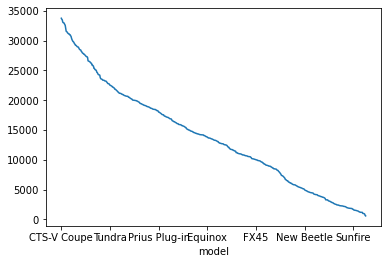

In [46]:
df_model = (df_clean.groupby('model')['sellingprice'].mean())
print(df_model)
df_model.sort_values(ascending=False).plot(kind='line')

**Data Insight**

model dari mobil dapat diurutkan melalui harga mobil. Sehingga data tersebut termasuk ordinal.Oleh karena itu dapat dilakukan encoding label. Pengaruh lain dapat dipengaruhi oleh lainnya.

In [47]:
df_model = (df_clean.groupby('model')['sellingprice'].mean())
df_model = df_model.reset_index()
df_model
df_model = df_model.rename(columns = {'model':'model','sellingprice':'sellingprice_model'})

In [48]:
model_ordering = df_model.sort_values(ascending=False,by='sellingprice_model')['model'].unique().tolist()
model_ordering

['CTS-V Coupe',
 '4 Series',
 'MKC',
 'Range Rover Evoque',
 'LS 600h L',
 '3 Series Gran Turismo',
 'A7',
 'QX70',
 'QX50',
 'allroad',
 'RLX',
 'ActiveHybrid 7',
 'QX60',
 'XJ',
 'LR4',
 'Q70',
 'JX',
 'Black Diamond Avalanche',
 'GX 460',
 'Transit Wagon',
 'CLA-Class',
 'Q3',
 'Q50',
 'ES 300h',
 'XTS',
 'QX',
 'Q60 Coupe',
 'IS 350 C',
 '3500',
 'X6',
 'F-450 Super Duty',
 'XK',
 'Murano CrossCabriolet',
 '5 Series Gran Turismo',
 'Shelby GT500',
 'X1',
 'B-Class Electric Drive',
 'WRX',
 'M6',
 'FX',
 'Silverado 3500HD',
 'Prowler',
 'G-Class',
 'RX 450h',
 'ZDX',
 '2500',
 '2 Series',
 'GS 350',
 'ActiveHybrid 5',
 'IS F',
 'V60',
 'S5',
 'Impreza WRX',
 'G Convertible',
 'Equus',
 'RX 350',
 'IS 250 C',
 'Golf R',
 'Q5',
 'Sierra 3500HD',
 'ActiveHybrid X6',
 'M',
 'TLX',
 'Sprinter',
 'M56',
 'Avalon Hybrid',
 'Sierra 2500HD Classic',
 'Cayman S',
 'Accord Hybrid',
 'GLK-Class',
 'Escalade Hybrid',
 'Transit Van',
 'XC60',
 'XF',
 'A5',
 'MKT',
 'FX50',
 'Lancer Evolution',
 '

In [49]:
df_clean = df_clean.merge(df_model,how='left')
df_clean

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,sm,month,day,hour,make_new,sellingprice_model
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,"kia motors america, inc",20500.0,21500.0,2014-12-16 04:30:00+00:00,1.048780,December,Tuesday,04:00,Kia,15839.211135
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,"kia motors america, inc",20800.0,21500.0,2014-12-16 04:30:00+00:00,1.033654,December,Tuesday,04:00,Kia,15839.211135
2,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,1.009091,January,Wednesday,20:00,Other,15503.314121
3,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,...,audi mission viejo,32100.0,32250.0,2014-12-18 04:00:00+00:00,1.004673,December,Thursday,04:00,Other,15171.984318
4,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,...,kia motors finance,15150.0,17700.0,2014-12-16 04:00:00+00:00,1.168317,December,Tuesday,04:00,Kia,14559.969989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198344,2015,Chrysler,300,C,sedan,automatic,2c3ka63h46h281500,ca,2.8,57280.0,...,gulliver,9400.0,11750.0,2015-07-08 02:45:00+00:00,1.250000,July,Wednesday,02:00,Chrysler,14066.461431
198345,2015,Ford,Flex,SEL,Wagon,automatic,2fmhk6cc1cbd17905,ny,3.9,28320.0,...,"ford motor credit company,llc",21500.0,22300.0,2015-07-08 00:30:00+00:00,1.037209,July,Wednesday,00:00,Ford,20004.063604
198346,2015,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,...,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2015-07-06 23:15:00+00:00,1.123153,July,Monday,23:00,BMW,19308.257450
198347,2015,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 02:30:00+00:00,1.019868,July,Wednesday,02:00,Other,27855.882353


**Trim Mobil**

In [50]:
#Call the function with a default threshold of 90%
df_clean['trim_new'],new_category_list=cumulatively_categorise(df_clean['trim'],return_categories_list=True)

In [51]:
df_clean['trim_new'].nunique()

170

Variabel dari trim masih tetap banyak

In [52]:
df_clean.groupby('trim_new')['sellingprice'].std()/df_clean.groupby('trim_new')['sellingprice'].mean()*100

trim_new
!             22.870400
+             12.864178
1.6 S Plus    10.131667
1.6 SV         9.273884
1.8 S         33.564257
                ...    
XLT           41.892211
XR            28.861209
i Sport       27.687531
i Touring     28.719459
xDrive28i     11.181405
Name: sellingprice, Length: 170, dtype: float64

In [53]:
print(df_clean.groupby(['make_new','model'])['trim_new'].unique())

make_new    model                
BMW         1 Series                                                [Other]
            2 Series                                                [Other]
            3 Series                 [335i, 328i, 328i xDrive, Other, 325i]
            3 Series Gran Turismo                             [328i xDrive]
            4 Series                                                [Other]
                                                      ...                  
Volkswagen  Rabbit                                 [S PZEV, Base, Other, S]
            Routan                                      [SE, SEL, Other, S]
            Tiguan                                  [SE, S, Other, SEL, LE]
            Touareg                                             [Other, V6]
            Touareg 2                                               [Other]
Name: trim_new, Length: 628, dtype: object


        model  sellingprice_model
0    1 Series        19926.250000
1        1500        23196.975628
2    2 Series        27730.000000
3         200        11717.550282
4        2500        27855.882353
..        ...                 ...
621    malibu         8241.176471
622        tC        10987.293729
623        xA         3300.000000
624        xB         9469.540230
625        xD        10110.526316

[626 rows x 2 columns]


<AxesSubplot:xlabel='trim_new'>

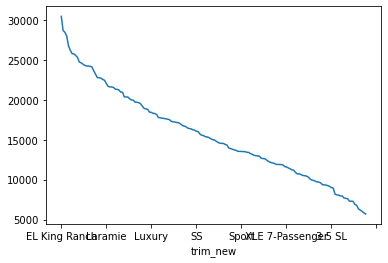

In [54]:
df_trim = (df_clean.groupby('trim_new')['sellingprice'].mean())
print(df_model)
df_trim.sort_values(ascending=False).plot(kind='line')

In [55]:
df_trim

trim_new
!              9968.112245
+             13196.293243
1.6 S Plus     9712.334884
1.6 SV        10925.648111
1.8 S          6796.741304
                  ...     
XLT           19231.226635
XR             7303.385417
i Sport       10663.177465
i Touring     11921.329365
xDrive28i     28736.375000
Name: sellingprice, Length: 170, dtype: float64

**Data Insight**

trim dari mobil dapat diurutkan melalui harga mobil. Sehingga data tersebut termasuk ordinal.Oleh karena itu dapat dilakukan encoding label. Pengaruh lain dapat dipengaruhi oleh lainnya.

In [56]:
df_trim = df_trim.reset_index()
df_trim = df_trim.rename(columns = {'trim':'trim','sellingprice':'sellingprice_trim'})

In [57]:
trim_ordering = df_trim.sort_values(ascending=False,by='sellingprice_trim')['trim_new'].unique().tolist()

In [58]:
df_clean = df_clean.merge(df_trim,how='left')
df_clean

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,sellingprice,saledate,sm,month,day,hour,make_new,sellingprice_model,trim_new,sellingprice_trim
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,21500.0,2014-12-16 04:30:00+00:00,1.048780,December,Tuesday,04:00,Kia,15839.211135,LX,12198.664768
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,21500.0,2014-12-16 04:30:00+00:00,1.033654,December,Tuesday,04:00,Kia,15839.211135,LX,12198.664768
2,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,27750.0,2015-01-28 20:30:00+00:00,1.009091,January,Wednesday,20:00,Other,15503.314121,T5,17256.776557
3,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,...,32250.0,2014-12-18 04:00:00+00:00,1.004673,December,Thursday,04:00,Other,15171.984318,Other,15395.118088
4,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,...,17700.0,2014-12-16 04:00:00+00:00,1.168317,December,Tuesday,04:00,Kia,14559.969989,LX,12198.664768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198344,2015,Chrysler,300,C,sedan,automatic,2c3ka63h46h281500,ca,2.8,57280.0,...,11750.0,2015-07-08 02:45:00+00:00,1.250000,July,Wednesday,02:00,Chrysler,14066.461431,C,15541.077889
198345,2015,Ford,Flex,SEL,Wagon,automatic,2fmhk6cc1cbd17905,ny,3.9,28320.0,...,22300.0,2015-07-08 00:30:00+00:00,1.037209,July,Wednesday,00:00,Ford,20004.063604,SEL,15731.152370
198346,2015,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,...,22800.0,2015-07-06 23:15:00+00:00,1.123153,July,Monday,23:00,BMW,19308.257450,528i,24281.749311
198347,2015,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,30800.0,2015-07-08 02:30:00+00:00,1.019868,July,Wednesday,02:00,Other,27855.882353,Other,15395.118088


**Body Mobil**

In [59]:
print(df_clean.groupby(['make','model'])['body'].unique())

make   model 
Acura  CL                             [Coupe, coupe]
       ILX                            [Sedan, sedan]
       MDX                                [SUV, suv]
       RDX                                [SUV, suv]
       RL                             [Sedan, sedan]
                                ...                 
Volvo  XC                                    [Wagon]
       XC60                               [SUV, suv]
       XC70                           [Wagon, wagon]
       XC90                               [SUV, suv]
smart  fortwo    [Hatchback, Convertible, hatchback]
Name: body, Length: 628, dtype: object


data dari body mobil dapat terwakili oleh make dan mobil sehingga tidak perlu dimasukan sehingga dapat **didrop**

**Color**

In [60]:
#Call the function with a default threshold of 90%
df_clean['color_new'],new_category_list=cumulatively_categorise(df_clean['color'],return_categories_list=True)

In [61]:
df_clean['color_new'].nunique()

8

variabel color dapat dilakukan one hot encode

**interior**

In [62]:
#Call the function with a default threshold of 90%
df_clean['interior_new'],new_category_list=cumulatively_categorise(df_clean['interior'],return_categories_list=True)

In [63]:
df_clean['interior_new'].nunique()

5

variabel interior dapat dilakukan one hot encode

**Country**

In [64]:
print(df['state'].unique())

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'pr' 'or' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' 'ns']


state di united states dapat disederhanakan melalui region us

In [65]:
df_wilayah = pd.DataFrame({'state':['ca','tx','pa','mn','az','wi','tn','md','fl','ne','nj','nv','oh','mi'
,'ga','va','sc','nc','in','il','co','ut','mo','ny','ma','pr','or','la'
,'wa','hi','qc','ab','on','ok','ms','nm','al','ns'
],
                          'region':['W','SW','NE','MW','SW','MW','SW','Other','SE','MW','NE','W','MW','MW','SW',
                                   'SE','SE','SE','MW','MW','SW','W','MW','NE','NE','Other','W','SE',
                                    'W','W','Other','Other','Other','SW','SE','SW','SE','Other']})
df_wilayah

,state,region
0,ca,W
1,tx,SW
2,pa,NE
3,mn,MW
4,az,SW
5,wi,MW
6,tn,SW
7,md,Other
8,fl,SE
9,ne,MW


In [66]:
df_clean = df_clean.merge(df_wilayah,how='left')
df_clean.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,month,day,hour,make_new,sellingprice_model,trim_new,sellingprice_trim,color_new,interior_new,region
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,December,Tuesday,04:00,Kia,15839.211135,LX,12198.664768,white,black,W
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,December,Tuesday,04:00,Kia,15839.211135,LX,12198.664768,white,beige,W
2,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,January,Wednesday,20:00,Other,15503.314121,T5,17256.776557,white,black,W
3,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,...,December,Thursday,04:00,Other,15171.984318,Other,15395.118088,white,black,W
4,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,...,December,Tuesday,04:00,Kia,14559.969989,LX,12198.664768,red,tan,W


In [67]:
df_clean.drop(['make','trim','color','interior','state','seller','vin','saledate'
               ,'month','day','hour','sellingprice_model','sellingprice_trim'], axis=1, inplace=True)

In [68]:
df_clean.head(5)

,year,model,body,transmission,condition,odometer,mmr,sellingprice,sm,make_new,trim_new,color_new,interior_new,region
0,2014,Sorento,SUV,automatic,5.0,16639.0,20500.0,21500.0,1.048780,Kia,LX,white,black,W
1,2014,Sorento,SUV,automatic,5.0,9393.0,20800.0,21500.0,1.033654,Kia,LX,white,beige,W
2,2015,S60,Sedan,automatic,4.1,14282.0,27500.0,27750.0,1.009091,Other,T5,white,black,W
3,2014,A4,Sedan,automatic,4.2,9557.0,32100.0,32250.0,1.004673,Other,Other,white,black,W
4,2014,Optima,Sedan,automatic,4.8,2034.0,15150.0,17700.0,1.168317,Kia,LX,red,tan,W


In [69]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Number of Duplicated'])

for i, var in enumerate(df_clean.columns):
    variables.loc[i] = [var, df_clean[var].nunique(),df_clean[var].isnull().sum().sum(),df_clean[var].unique()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

             Number of unique values Number of Null  \
Variable                                              
year                               2              0   
model                            626              0   
body                              78              0   
transmission                       2              0   
condition                         35              0   
odometer                      100244              0   
mmr                              721              0   
sellingprice                     859              0   
sm                              9475              0   
make_new                          20              0   
trim_new                         170              0   
color_new                          8              0   
interior_new                       5              0   
region                             6              0   

                                           Number of Duplicated  
Variable                                             

In [70]:
numeric = ['year','condition','odometer','mmr']
nominal = ['make_new','region']
binary = ['transmission']
ordinal = ['model','trim_new']

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198349 entries, 0 to 198348
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          198349 non-null  object 
 1   model         198349 non-null  object 
 2   body          198349 non-null  object 
 3   transmission  198349 non-null  object 
 4   condition     198349 non-null  float64
 5   odometer      198349 non-null  float64
 6   mmr           198349 non-null  float64
 7   sellingprice  198349 non-null  float64
 8   sm            198349 non-null  float64
 9   make_new      198349 non-null  object 
 10  trim_new      198349 non-null  object 
 11  color_new     198349 non-null  object 
 12  interior_new  198349 non-null  object 
 13  region        198349 non-null  object 
dtypes: float64(5), object(9)
memory usage: 22.7+ MB


In [72]:
df_clean.drop(['color_new','body','interior_new'],axis=1,inplace=True)

# Data Modelling

In [73]:
Y = df_clean['sellingprice']
X = df_clean.drop('sellingprice',axis=1)
#nominal
def nominal_encode(df_clean, columns):
    df_clean = df_clean.copy()
    for column in columns:
        dummies = pd.get_dummies(df_clean[column])
        df_clean = pd.concat([df_clean, dummies], axis=1)
        df_clean.drop(column, axis=1, inplace=True)
    return df_clean
#ordinal
def ordinal_encode(df_clean, columns, orderings):
    df_clean = df_clean.copy()
    for column, ordering in zip(columns, orderings):
        df_clean[column] = df_clean[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df_clean
#binary
def binary_encode(df_clean, columns, positive_label):
    df_clean = df_clean.copy()
    for column in columns:
        df_clean[column] = df_clean[column].apply(lambda x: 1 if x == positive_label else 0)
    return df_clean

In [74]:
#nominal
X = nominal_encode(X,nominal)

In [75]:
#ordering
X = ordinal_encode(X,['model'] ,[model_ordering])

In [76]:
X = ordinal_encode(X,['trim_new'] ,[trim_ordering])

In [77]:
#binary
X = binary_encode(X, binary, 'automatic')

In [78]:
X

,year,model,transmission,condition,odometer,mmr,sm,trim_new,BMW,Cadillac,...,Other,Subaru,Toyota,Volkswagen,MW,NE,Other,SE,SW,W
0,2014,246,1,5.0,16639.0,20500.0,1.048780,116,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,246,1,5.0,9393.0,20800.0,1.033654,116,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2015,254,1,4.1,14282.0,27500.0,1.009091,63,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2014,258,1,4.2,9557.0,32100.0,1.004673,80,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2014,273,1,4.8,2034.0,15150.0,1.168317,116,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198344,2015,293,1,2.8,57280.0,9400.0,1.250000,79,0,0,...,0,0,0,0,0,0,0,0,0,1
198345,2015,149,1,3.9,28320.0,21500.0,1.037209,77,0,0,...,0,0,0,0,0,1,0,0,0,0
198346,2015,166,1,3.9,66403.0,20300.0,1.123153,14,1,0,...,0,0,0,0,0,0,0,1,0,0
198347,2015,45,1,5.0,54393.0,30200.0,1.019868,80,0,0,...,1,0,0,0,0,0,0,0,0,1


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198349 entries, 0 to 198348
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           198349 non-null  object 
 1   model          198349 non-null  int64  
 2   transmission   198349 non-null  int64  
 3   condition      198349 non-null  float64
 4   odometer       198349 non-null  float64
 5   mmr            198349 non-null  float64
 6   sm             198349 non-null  float64
 7   trim_new       198349 non-null  int64  
 8   BMW            198349 non-null  uint8  
 9   Cadillac       198349 non-null  uint8  
 10  Chevrolet      198349 non-null  uint8  
 11  Chrysler       198349 non-null  uint8  
 12  Dodge          198349 non-null  uint8  
 13  Ford           198349 non-null  uint8  
 14  GMC            198349 non-null  uint8  
 15  Honda          198349 non-null  uint8  
 16  Hyundai        198349 non-null  uint8  
 17  Infiniti       198349 non-nul

### Korelasi dengan banyak variabel

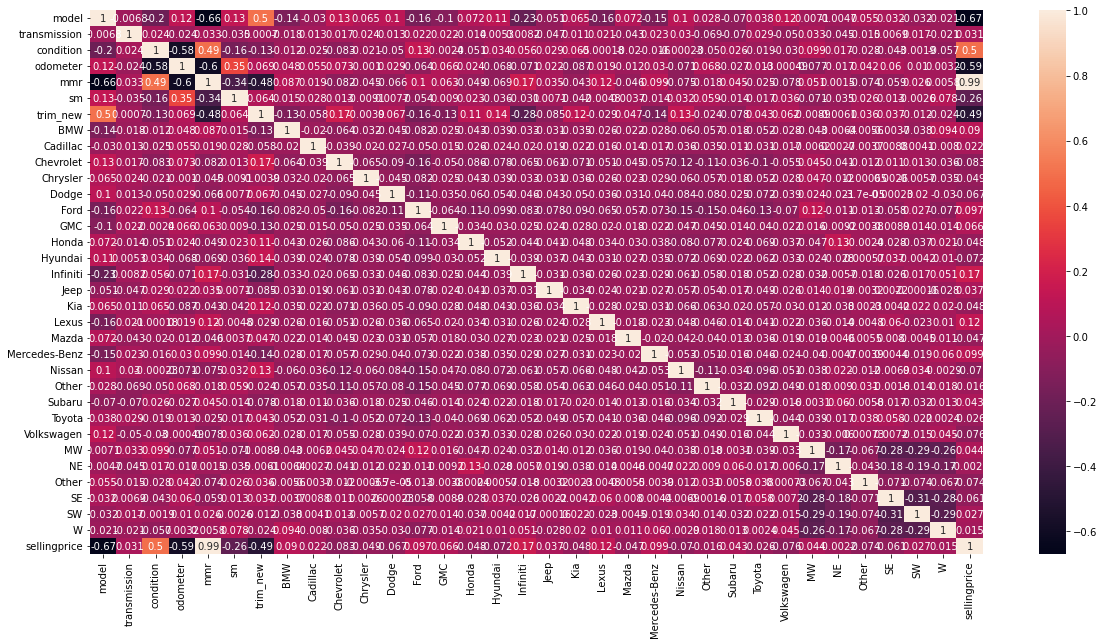

In [80]:
df_corr = X.copy()
df_corr['sellingprice'] = df_clean['sellingprice']
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

model, trim dan mmr memiliki korelasi yang cukup kuat dengan selling price

nilai mmr dapat menganggu korelasi dengan selling price dengan memiliki korelasi dengan beberapa variabel

In [81]:
X.drop(['mmr'],axis=1,inplace=True)

In [82]:
X.head(2)

,year,model,transmission,condition,odometer,sm,trim_new,BMW,Cadillac,Chevrolet,...,Other,Subaru,Toyota,Volkswagen,MW,NE,Other,SE,SW,W
0,2014,246,1,5.0,16639.0,1.048780,116,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,246,1,5.0,9393.0,1.033654,116,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
random_state=10)

## Scaler 
data yang ada cenderung lebih banyak outliernya sehingga dipilih min max scaller

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
Y_pred_train = lr.predict(X_train)

In [86]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

lrtest = r2_score(Y_test,Y_pred)
print('Score Model ->',lrtest)

lrtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',lrtrain)

lrmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',lrmae)

lrmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',lrmse)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

adjusted_r_squared = 1 - (1-lrtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

lrtest = r2_score(Y_train,Y_pred_train)
lrover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',lrover)

Score Model -> 0.764456110605823
Score Train -> 0.7665983068421006
MAE -> 2516.1431917485925
MSE -> 11720248.510689335
RMSE -> 3423.4848489060582
Adjusted R2 -> 0.764416915646541
Indication Overfitting -> 0.002142196236277649


### Lasso

In [87]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train, Y_train)
Y_pred=ls.predict(X_test)
Y_pred_train = ls.predict(X_train)

In [88]:
# Evaluation

lstest = r2_score(Y_test,Y_pred)
print('Score Model ->',lstest)

lstrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',lstrain)

lsmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',lsmae)

lsmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',lsmse)

lsrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lsrmse)

adjusted_r_squared = 1 - (1-lstest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

lstest = r2_score(Y_train,Y_pred_train)
lsover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',lsover)

Score Model -> 0.764440795498058
Score Train -> 0.7665798357252085
MAE -> 2515.5385674231575
MSE -> 11721010.563440673
RMSE -> 3423.5961449097167
Adjusted R2 -> 0.7644015979903124
Indication Overfitting -> 0.0021390402271505016


In [89]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(X_train, Y_train)
Y_pred=rg.predict(X_test)
Y_pred_train = rg.predict(X_train)

In [90]:
# Evaluation

rgtest = r2_score(Y_test,Y_pred)
print('Score Model ->',rgtest)

rgtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rgtrain)

rgmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rgmae)

rgmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rgmse)

rgrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rgrmse)

adjusted_r_squared = 1 - (1-rgtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rgtest = r2_score(Y_train,Y_pred_train)
rgover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rgover)


Score Model -> 0.7644555970941816
Score Train -> 0.7665982786577624
MAE -> 2516.149454738946
MSE -> 11720274.062122935
RMSE -> 3423.488580691184
Adjusted R2 -> 0.7644164020494504
Indication Overfitting -> 0.0021426815635807728


In [91]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(X_train, Y_train)
Y_pred =dc.predict(X_test)
Y_pred_train = dc.predict(X_train)

In [92]:
# Evaluation

dctest = r2_score(Y_test,Y_pred)
print('Score Model ->',dctest)

dctrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',dctrain)

dcmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',dcmae)

dcmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',dcmse)

dcrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',dcrmse)

adjusted_r_squared = 1 - (1-dctest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

dctest = r2_score(Y_train,Y_pred_train)
dcover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',dcover)

Score Model -> 0.8204024221012787
Score Train -> 1.0
MAE -> 1863.559969750441
MSE -> 8936458.722426686
RMSE -> 2989.3910286924133
Adjusted R2 -> 0.8203725367165591
Indication Overfitting -> 0.17959757789872133


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred =rf.predict(X_test)
Y_pred_train = rf.predict(X_train)

In [94]:
# Evaluation

rftest = r2_score(Y_test,Y_pred)
print('Score Model ->',rftest)

rftrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rftrain)

rfmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rfmae)

rfmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rfmse)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

adjusted_r_squared = 1 - (1-rftest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rftest = r2_score(Y_train,Y_pred_train)
rfover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rfover)

Score Model -> 0.907032461452589
Score Train -> 0.9871568532955753
MAE -> 1370.8854993698008
MSE -> 4625900.752531616
RMSE -> 2150.790727274882
Adjusted R2 -> 0.9070169914741604
Indication Overfitting -> 0.08012439184298636


In [95]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, Y_train)
Y_pred =ab.predict(X_test)
Y_pred_train = ab.predict(X_train)

In [96]:
# Evaluation

abtest = r2_score(Y_test,Y_pred)
print('Score Model ->',abtest)

abtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',abtrain)

abmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',abmae)

abmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',abmse)

abrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',abrmse)

adjusted_r_squared = 1 - (1-abtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

abtest = r2_score(Y_train,Y_pred_train)
abover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Oveabitting ->',abover)

Score Model -> 0.6693721249146132
Score Train -> 0.6712431301909195
MAE -> 3293.5886480404415
MSE -> 16451459.940347241
RMSE -> 4056.039933278177
Adjusted R2 -> 0.6693171077959997
Indication Oveabitting -> 0.0018710052763063478


In [97]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)
Y_pred =model.predict(X_test)
Y_pred_train = model.predict(X_train)

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 4.31444e+07	valid_0's l1: 5244.57
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 3.77314e+07	valid_0's l1: 4879.13
[3]	valid_0's l2: 3.3296e+07	valid_0's l1: 4558.62
[4]	valid_0's l2: 2.96151e+07	valid_0's l1: 4270.84
[5]	valid_0's l2: 2.66296e+07	valid_0's l1: 4023.48
[6]	valid_0's l2: 2.41385e+07	valid_0's l1: 3810.15
[7]	valid_0's l2: 2.20571e+07	valid_0's l1: 3622.35
[8]	valid_0's l2: 2.03203e+07	valid_0's l1: 3453.05
[9]	valid_0's l2: 1.88615e+07	valid_0's l1: 3311.41
[10]	valid_0's l2: 1.76251e+07	valid_0's l1: 3185.22
[11]	valid_0's l2: 1.6566e+07	valid_0's l1: 3072
[12]	valid_0's l2: 1.56647e+07	valid_0's l1: 2974.29
[13]	valid_0's l2: 1.49154e+07	valid_0's l1: 2890.13
[14]	valid_0's l2: 1.42753e+07	valid_0's l1: 2818.48
[15]	valid_0's l2: 1.37007e+07	valid_0's l1: 2749.52
[16]	valid_0's l2: 1.32192e+07	valid_0's l1: 2692.68
[17]	valid_0's l2: 1.2769e+07	valid_0's l1: 2638.24

In [98]:
# Evaluation

modeltest = r2_score(Y_test,Y_pred)
print('Score Model ->',modeltest)

modeltrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',modeltrain)

modelmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',modelmae)

modelmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',modelmse)

modelrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',modelrmse)

adjusted_r_squared = 1 - (1-modeltest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

modeltest = r2_score(Y_train,Y_pred_train)
modelover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Ovemodelitting ->',modelover)


Score Model -> 0.8393674579729985
Score Train -> 0.8430185298280096
MAE -> 1995.592019356546
MSE -> 7992791.985826607
RMSE -> 2827.152628675468
Adjusted R2 -> 0.8393407284069703
Indication Ovemodelitting -> 0.003651071855011123


In [99]:
df_eval = pd.DataFrame({'model':['linear','lasso','ridge','decission tree','random forest','ada boost','xgb lightgbm'],
                        'score':[lrtest,lstest,rgtest,dctest,rftest,abtest,modeltest],
                       'MAE':[lrmae,lsmae,rgmae,dcmae,rfmae,abmae,modelmae],
                       'MSE':[lrmse,lsmse,rgmse,dcmse,rfmse,abmse,modelmse],
                       'RMSE':[lrrmse,lsrmse,rgrmse,dcrmse,rfrmse,abrmse,modelrmse],
                       'Indication Ovefitting':[lrover,lsover,rgover,dcover,rfover,abover,modelover]})
df_eval

,model,score,MAE,MSE,RMSE,Indication Ovefitting
0,linear,0.766598,2516.143192,1.172025e+07,3423.484849,0.002142
1,lasso,0.766580,2515.538567,1.172101e+07,3423.596145,0.002139
2,ridge,0.766598,2516.149455,1.172027e+07,3423.488581,0.002143
3,decission tree,1.000000,1863.559970,8.936459e+06,2989.391029,0.179598
4,random forest,0.987157,1370.885499,4.625901e+06,2150.790727,0.080124
5,ada boost,0.671243,3293.588648,1.645146e+07,4056.039933,0.001871
6,xgb lightgbm,0.843019,1995.592019,7.992792e+06,2827.152629,0.003651


model random forest memiliki score yang tinggi MAE yang rendah dan indikasi overfitting yang rendah

In [100]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# HyperTuning Model
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]#n_estimators learning curve,kurang max depth
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None,1.0]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion
criterion = ['squared_error']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,)
# Fit the random search model
rf_random.fit(X_train,Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
